In [3]:
#This is for opening web cam and detecting your face and emotion
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace
from pydub import AudioSegment
from pydub.playback import play
from playsound import playsound
import IPython


<module 'matplotlib.pyplot' from 'C:\\Users\\ashmi\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\matplotlib\\pyplot.py'>

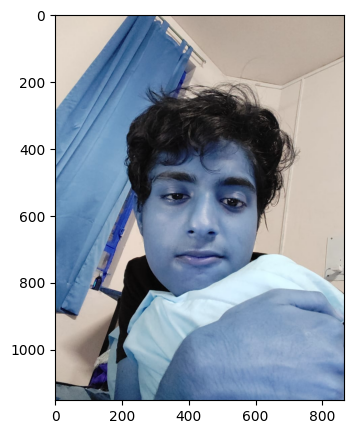

In [4]:
img=cv2.imread('ash.jpeg')
plt.figure(figsize=(5,5))
plt.imshow(img)
plt

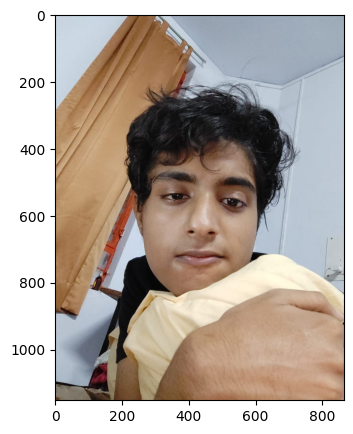

In [5]:
colour_img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(5,5))
plt.imshow(colour_img)

In [10]:
prediction = DeepFace.analyze(colour_img)

Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 196ms/step


Action: age:  25%|█████████████████▊                                                     | 1/4 [00:00<00:01,  2.32it/s]

1/1 [==============================] - 0s 291ms/step


Action: gender:  50%|██████████████████████████████████                                  | 2/4 [00:00<00:00,  2.23it/s]

1/1 [==============================] - 0s 275ms/step


Action: race:  75%|████████████████████████████████████████████████████▌                 | 3/4 [00:01<00:00,  2.61it/s]

1/1 [==============================] - 0s 362ms/step


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.51it/s]


In [23]:
prediction

{'emotion': {'angry': 0.018403996364213526,
  'disgust': 2.125643584760528e-09,
  'fear': 0.0015051639820740093,
  'happy': 0.02041736588580534,
  'sad': 0.370203098282218,
  'surprise': 3.5890085570144947e-06,
  'neutral': 99.58946704864502},
 'dominant_emotion': 'neutral',
 'region': {'x': 211, 'y': 364, 'w': 471, 'h': 471},
 'age': 32,
 'gender': 'Man',
 'race': {'asian': 0.2827123273164034,
  'indian': 30.41696548461914,
  'black': 0.4664536099880934,
  'white': 8.923593908548355,
  'middle eastern': 43.70222091674805,
  'latino hispanic': 16.20805710554123},
 'dominant_race': 'middle eastern'}

In [24]:
prediction['race']

{'asian': 0.2827123273164034,
 'indian': 30.41696548461914,
 'black': 0.4664536099880934,
 'white': 8.923593908548355,
 'middle eastern': 43.70222091674805,
 'latino hispanic': 16.20805710554123}

In [25]:
dominant_race=prediction['dominant_race']
dominant_race

'middle eastern'

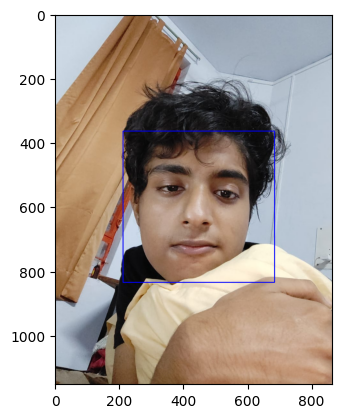

In [26]:
#loading our xml file into faceCascade using cv2.CascadeClassifier
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')

#detecting face in color_image and getting 4 points(x,y,u,v) around face from the image, and assigning those values to 'faces' variable 
faces = faceCascade.detectMultiScale(colour_img, 1.1, 4)

#using that 4 points to draw a rectangle around face in the image
for (x, y, u, v) in faces:
    cv2.rectangle(colour_img, (x,y), (x+u, y+v), (0, 0, 285), 2)
    
plt.imshow(colour_img)


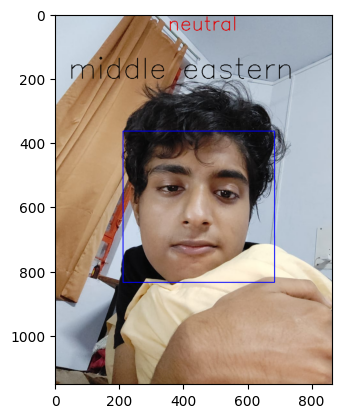

In [27]:

#choose font for text
font = cv2.FONT_HERSHEY_SIMPLEX

#for showing emotion on image
cv2.putText(colour_img, prediction['dominant_emotion'], (350, 50), font, 2, 
(225,0,0), 2, cv2.LINE_4)

#for showing race on image
cv2.putText(colour_img, prediction['dominant_race'], (40, 200),font,  3,
(0,0,0), 2, cv2.LINE_4)
#finally displaying image

plt.imshow(colour_img)


In [9]:

#Now we would write a code to open the camera and capture your own image and detect accordingly



faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

font = cv2.FONT_HERSHEY_SIMPLEX

cap = cv2.VideoCapture(0) #to start capture

if not cap.isOpened():
    cap = cv2.VideoCapture(1)
if not cap.isOpened():
    raise IOError("cannot open")

while True:
    ret, frame = cap.read()
    result = DeepFace.analyze(frame, actions=[ 'race' ])

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(gray, 1.1, 4) #dectecting face

    #for drawing rectangle on detected face (detecting it)
    for(x, y, u, v) in faces:
        cv2.rectangle(frame, (x, y), (x+u, y+v), (0,255,0), 2)

    #for putting text on img
    cv2.putText(frame, result['dominant_race'], (50, 50), font, 3, (0,0,255), 2, cv2.LINE_4)
    
    cv2.imshow('original video', frame)
    raceval=result['dominant_race']

    #for closing cam press 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'): #to end capture when 'q' is pressed
        break

    result
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 277ms/step


1/1 [==============================] - 0s 414ms/step


1/1 [==============================] - 0s 247ms/step


1/1 [==============================] - 0s 284ms/step


TypeError: object of type 'NoneType' has no len()

In [7]:
raceval
#now to play the audio based on your race 
if raceval=="middle eastern":
 IPython.display.Audio("middle_eastern.mp3")
 print("I was playing FIFA with my Middle Eastern Friend , but all i could hear from his mic was counter strike ")
elif raceval=="indian":
 IPython.display.Audio("indian.mp3")
 print("Oh look an Indian! well i sure do hope i don't get scammed")
elif raceval=="asian":
 IPython.display.Audio("asian.mp3")
 print("A fun fact about asians is that the more they laugh the less they see")
elif raceval=="hispanic latino":
 IPython.display.Audio("hispanic.mp3")
 print("What does a mexican do when he plays UNO? well, he steals all the green cards")
elif raceval=="black":
 IPython.display.Audio("black.mp3")
 print("I know it's wrong to think that a mexican stole my bike , but it was probably a black guy")
elif raceval=="white":
 IPython.display.Audio("white.mp3")
 print("If i had a dollar evertime someone was racist against a white guy, i'd be robbing people in chicago")
else:
 print("Can't Find your face lmao")
    

Oh look an Indian! well i sure do hope i don't get scammed
